In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv('ad.csv')

## 1. Контекст задачи

Агенство недвижимости проводит рекламную кампанию с привлечением инфлюенсеров А и В. Кампания будет считаться успешной при увеличении конверсии на 10% от старта рекламной компании.

## 2. Формулировка гипотезы

H0: p(a) = p(b)

H1: p(a) ≠ p(b)

где p(a) и p(b) коэффициент конверсии инфлюенсеров А и В соответственно. 

Уровень доверия 95%, то есть α =0,05

## 3. Набор данных

In [11]:
df = pd.read_csv('ad.csv')

In [13]:
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


## 4. Статистика набора данных

In [20]:
lambda_def = lambda x: len(x)

In [45]:
sum_df['total_count'] = df.pivot_table(values='action', index = 'ad_id', aggfunc = lambda_def)
sum_df['conversion_rate'] = df.pivot_table(values='action', index = 'ad_id')
sum_df['sdp_p'] = df.pivot_table(values='action', index = 'ad_id', aggfunc = lambda x :np.std(x, ddof=0))
sum_df['se_p'] = df.pivot_table(values='action', index = 'ad_id', aggfunc = lambda x : stats.sem(x, ddof=0))

In [46]:
sum_df

,action,total_count,conversion_rate,sdp_p,se_p
ad_id,,,,,
A,304,1000,0.304,0.459983,0.014546
B,372,1000,0.372,0.483338,0.015285


### Визуализация промежуточных выводов

Text(0, 0.5, 'Коэффициент конверсии')

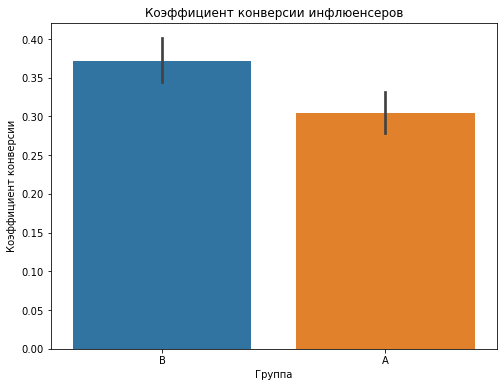

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['ad_id'],y=df['action'] )
plt.title ('Коэффициент конверсии инфлюенсеров')
plt.xlabel('Группа')
plt.ylabel('Коэффициент конверсии')

## 5.Проверка гипотезы

### z - статистика

In [64]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [65]:
control_results = df[df['ad_id'] == 'A']['action']
test_results = df[df['ad_id'] == 'B']['action']

In [69]:
nobs = [control_results.count(), test_results.count()]
successes = [control_results.sum(), test_results.sum()]

z_stat, pval = proportions_ztest (successes,nobs)
print('z_statistic:',z_stat)
print('p-value:',pval)



z_statistic: -3.2144492244084213
p-value: 0.0013069502732125403


In [70]:
alpha=0.05

In [71]:
print(pval < alpha )

True


Значение p-value < 0.05, что говорит о том, что рекламная кампания с инфлюенсером **В** наиболее эффективна.

In [72]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)

print('Доверительный интервал для контрольной группы A:', lower_con, ' - ', upper_con)
print('Доверительный интервал для тестовой группы B:', lower_test, ' - ', upper_test)

Доверительный интервал для контрольной группы A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для тестовой группы B: 0.3420429266473629  -  0.4019570733526371


###  Хи - квадрат

In [108]:
import statsmodels.stats.proportion as proportion

In [114]:
chi2stat, pval, table= proportion.proportions_chisquare(successes,nobs)

In [118]:
print('chi2stat:', z_stat)
print('p-value:', pval)
print('table:', pval)

chi2stat: -3.2144492244084213
p-value: 0.0013069502732125406
table: 0.0013069502732125406


In [116]:
alpha = 0.05

In [117]:
print(pval < alpha)

True


Значение p-value < 0.05, что говорит о том, что рекламная кампания с инфлюенсером **В** наиболее эффективна.

### T - статистика